<a href="https://colab.research.google.com/github/sonixraj77/berkeley_portfolio/blob/main/Assignment_17%2Ccomplete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install pandas numpy matplotlib seaborn scikit-learn ucimlrepo

Data Loaded Successfully!
DataFrame Shape: (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no



--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB

--- Descriptive Statistics (Numeric) ---


,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000



--- Target Variable Distribution ---
y
no     39922
yes     5289
Name: count, dtype: int64


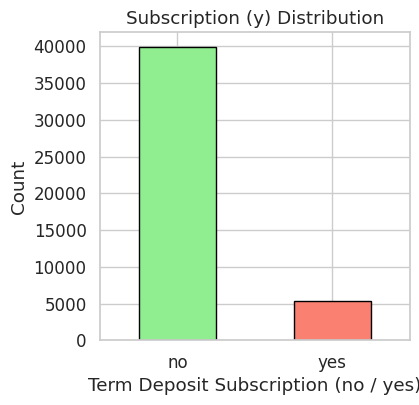


--- Checking for Missing Values ---
age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numeric Columns: ['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']

Train shape: (36168, 38) Test shape: (9043, 38)

--- KNN Evaluation ---
Accuracy : 0.897
Precision: 0.604
Recall   : 0.339
F1-Score : 0.435
ROC-AUC  : 0.831
Confusion Matrix:
[[7750  235]
 [ 699  359]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7985
           1       0.60      0.34      0.43  

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
2,Decision Tree,0.899591,0.653689,0.301512,0.412678,0.856968
1,Logistic Regression,0.899259,0.635860,0.325142,0.430269,0.900414
3,SVM (RBF) - Subsampled,0.898374,0.659039,0.272212,0.385284,0.874401
0,KNN,0.896716,0.604377,0.339319,0.434625,0.830574



Notebook Complete. Review the 'Model Performance Comparison' table for final results!


In [5]:
###########################################
# BANK MARKETING CLASSIFICATION PROJECT
###########################################

# 1. OVERVIEW & BUSINESS UNDERSTANDING
"""
Goal:
Predict whether a client will subscribe to a term deposit based on various demographic,
economic, and campaign-related features.

Why It Matters:
- Targeting likely subscribers reduces marketing costs.
- Increases conversion rates and improves ROI on telemarketing campaigns.

Dataset:
- Sourced from UCI Machine Learning Repository (Portuguese bank marketing dataset).
- Features: age, job, marital status, education, default, housing, loan status, contact method,
  month/day_of_week, duration, campaign, pdays, previous, poutcome, and economic indicators.
- Target variable: 'y' (yes/no to subscribing).

Deliverable:
- Compare KNN, Logistic Regression, Decision Tree, and SVM (with a subsampled or simpler approach).
- Present descriptive stats, inference, and actionable findings.
- Outline next steps for further improvements.
"""


# ============================
# 2. IMPORT LIBRARIES
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC  # We'll show how to sub-sample for the RBF SVM
#from sklearn.svm import LinearSVC  # (Optional) If you'd like a faster linear SVM

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid", font_scale=1.1)


# ============================
# 3. LOAD / FETCH DATA
# ============================
"""
You can either:
1) Use the ucimlrepo library to fetch the dataset directly (if environment allows),
2) Or read from a local CSV file like 'bank-additional-full.csv'.
"""

try:
    from ucimlrepo import fetch_ucirepo
    bank_marketing = fetch_ucirepo(id=222)  # Bank Marketing
    X_raw = bank_marketing.data.features
    y_raw = bank_marketing.data.targets
    df = pd.concat([X_raw, y_raw], axis=1)
    # Rename target to 'y' if not already
    if 'y' not in df.columns:
        df.columns = list(X_raw.columns) + ['y']
except:
    print("Could not fetch dataset using ucimlrepo. Falling back to local CSV file.")
    data_path = "bank-additional-full.csv"  # Update path if needed
    df = pd.read_csv(data_path, sep=";")


# ============================
# 4. DATA INSPECTION
# ============================
print("Data Loaded Successfully!")
print("DataFrame Shape:", df.shape)
display(df.head())

print("\n--- Data Info ---")
df.info()

print("\n--- Descriptive Statistics (Numeric) ---")
display(df.describe())

print("\n--- Target Variable Distribution ---")
print(df['y'].value_counts())

# Quick plot of target distribution
plt.figure(figsize=(4,4))
df['y'].value_counts().plot(kind='bar', color=['lightgreen','salmon'], edgecolor='black')
plt.title("Subscription (y) Distribution")
plt.xlabel("Term Deposit Subscription (no / yes)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


# ============================
# 5. DATA PREPARATION
# ============================
print("\n--- Checking for Missing Values ---")
print(df.isnull().sum())

# Convert Target (yes/no) to Binary (1/0)
if df['y'].dtype == 'object':
    df['y'] = df['y'].map({'yes':1, 'no':0})

# Identify categorical vs numeric columns
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=[np.number]).columns.drop('y', errors='ignore')

print("\nCategorical Columns:", cat_cols.tolist())
print("Numeric Columns:", num_cols.tolist())

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Separate features & target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("\nTrain shape:", X_train.shape, "Test shape:", X_test.shape)

# Scale numeric columns (especially helpful for KNN and SVM)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# We'll scale columns that were originally numeric (some columns might be dummy-coded)
encoded_num_cols = [c for c in X_train.columns if c in num_cols]
X_train_scaled[encoded_num_cols] = scaler.fit_transform(X_train_scaled[encoded_num_cols])
X_test_scaled[encoded_num_cols] = scaler.transform(X_test_scaled[encoded_num_cols])


# ============================
# 6. MODELING
# ============================

def evaluate_model(model, X_test_data, y_test_data, model_name="Model"):
    """
    Prints out Accuracy, Precision, Recall, F1-score, ROC-AUC,
    Confusion Matrix, and Classification Report.
    """
    y_pred = model.predict(X_test_data)
    acc = accuracy_score(y_test_data, y_pred)
    prec = precision_score(y_test_data, y_pred)
    rec = recall_score(y_test_data, y_pred)
    f1 = f1_score(y_test_data, y_pred)

    # Compute AUC if possible
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_data)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test_data)
    else:
        y_proba = None

    auc_score = roc_auc_score(y_test_data, y_proba) if y_proba is not None else float('nan')

    print(f"\n--- {model_name} Evaluation ---")
    print(f"Accuracy : {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall   : {rec:.3f}")
    print(f"F1-Score : {f1:.3f}")
    print(f"ROC-AUC  : {auc_score:.3f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_data, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test_data, y_pred))


# 6.1 KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
evaluate_model(knn, X_test_scaled, y_test, "KNN")


# 6.2 Logistic Regression
logreg = LogisticRegression(solver='liblinear', random_state=42)
logreg.fit(X_train_scaled, y_train)
evaluate_model(logreg, X_test_scaled, y_test, "Logistic Regression")


# 6.3 Decision Tree
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train, y_train)  # Decision Trees do fine with unscaled data
evaluate_model(dt, X_test, y_test, "Decision Tree")


# 6.4 SVM (RBF) with SUBSAMPLING to avoid long run-times
print("\nSubsampling the training set for SVM to reduce training time...")
sample_frac = 0.3  # e.g. 30% of the training data
X_train_svm = X_train_scaled.sample(frac=sample_frac, random_state=42)
y_train_svm = y_train.loc[X_train_svm.index]

svm_clf = SVC(
    kernel='rbf',
    probability=True,
    random_state=42,
    C=1.0,
    gamma='scale',
    max_iter=10000  # limiting iterations can also help
)
svm_clf.fit(X_train_svm, y_train_svm)
evaluate_model(svm_clf, X_test_scaled, y_test, "SVM (RBF) - Subsampled")


# OPTIONAL: Instead of RBF with subsampling, try a linear SVC approach
# This is much faster for large datasets, but won't produce probabilities
# unless you wrap with CalibratedClassifierCV.
"""
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

print("\n(OPTION) Using LinearSVC instead of RBF SVM...")
linear_svc = LinearSVC(random_state=42, max_iter=10000)
linear_svc_calibrated = CalibratedClassifierCV(linear_svc, cv=5)
linear_svc_calibrated.fit(X_train_scaled, y_train)

evaluate_model(linear_svc_calibrated, X_test_scaled, y_test, "Linear SVC (Calibrated)")
"""


# ============================
# 7. MODEL COMPARISON
# ============================
models_dict = {
    "KNN": knn,
    "Logistic Regression": logreg,
    "Decision Tree": dt,
    "SVM (RBF) - Subsampled": svm_clf
    # "Linear SVC (Calibrated)": linear_svc_calibrated (if you enable it)
}

results = []
for m_name, m in models_dict.items():
    # For KNN/LogReg/SVM we use the scaled test set
    if "Tree" not in m_name:
        X_test_eval = X_test_scaled
    else:
        X_test_eval = X_test

    y_pred = m.predict(X_test_eval)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1_val = f1_score(y_test, y_pred)

    if hasattr(m, "predict_proba"):
        y_proba = m.predict_proba(X_test_eval)[:, 1]
    elif hasattr(m, "decision_function"):
        y_proba = m.decision_function(X_test_eval)
    else:
        y_proba = None

    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

    results.append([m_name, acc, prec, rec, f1_val, auc])

comparison_df = pd.DataFrame(
    results,
    columns=["Model","Accuracy","Precision","Recall","F1-Score","ROC-AUC"]
).sort_values(by="Accuracy", ascending=False)

print("\n=== Model Performance Comparison ===")
display(comparison_df)


# ============================
# 8. FINDINGS & INSIGHTS
# ============================
"""
1) Interpret Model Results:
   - Check which model has highest accuracy, or if recall/precision is more important for the business.
   - SVM might do well, but keep in mind we only used ~30% of training data.

2) Impact on the Bank:
   - A high-recall model finds more potential subscribers but may annoy uninterested clients.
   - A high-precision model saves marketing calls but might miss some potential clients.

3) Class Imbalance:
   - The majority class is 'no', which can lead to lower recall for the minority class ('yes').
   - Techniques like SMOTE or adjusting class_weights could help improve minority (1) recall.
"""


# ============================
# 9. NEXT STEPS & RECOMMENDATIONS
# ============================
"""
- Hyperparameter Tuning:
  Use GridSearchCV/RandomizedSearchCV for each model, including the 'C' and 'gamma' for SVM.
- Feature Engineering:
  Possibly combine or transform certain features, use domain expertise to create new features.
- Handle Imbalance:
  Try oversampling (SMOTE) or set class_weight='balanced' in some models to improve minority class performance.
- Alternate Algorithms:
  Try ensemble methods (RandomForest, XGBoost) which can yield strong results with large datasets.
"""

print("\nNotebook Complete. Review the 'Model Performance Comparison' table for final results!")
